In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris_df = sns.load_dataset('iris')
iris_df.head() # See the first 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
print('The size of Dataframe is: ', iris_df.shape)
print('\n')
iris_df.info()

The size of Dataframe is:  (150, 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris_df.shape

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
def missing_data(data):

    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [7]:

missing_data(data= iris_df)

,Total,Percent
sepal_length,0,0.0
sepal_width,0,0.0
petal_length,0,0.0
petal_width,0,0.0
species,0,0.0


In [8]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


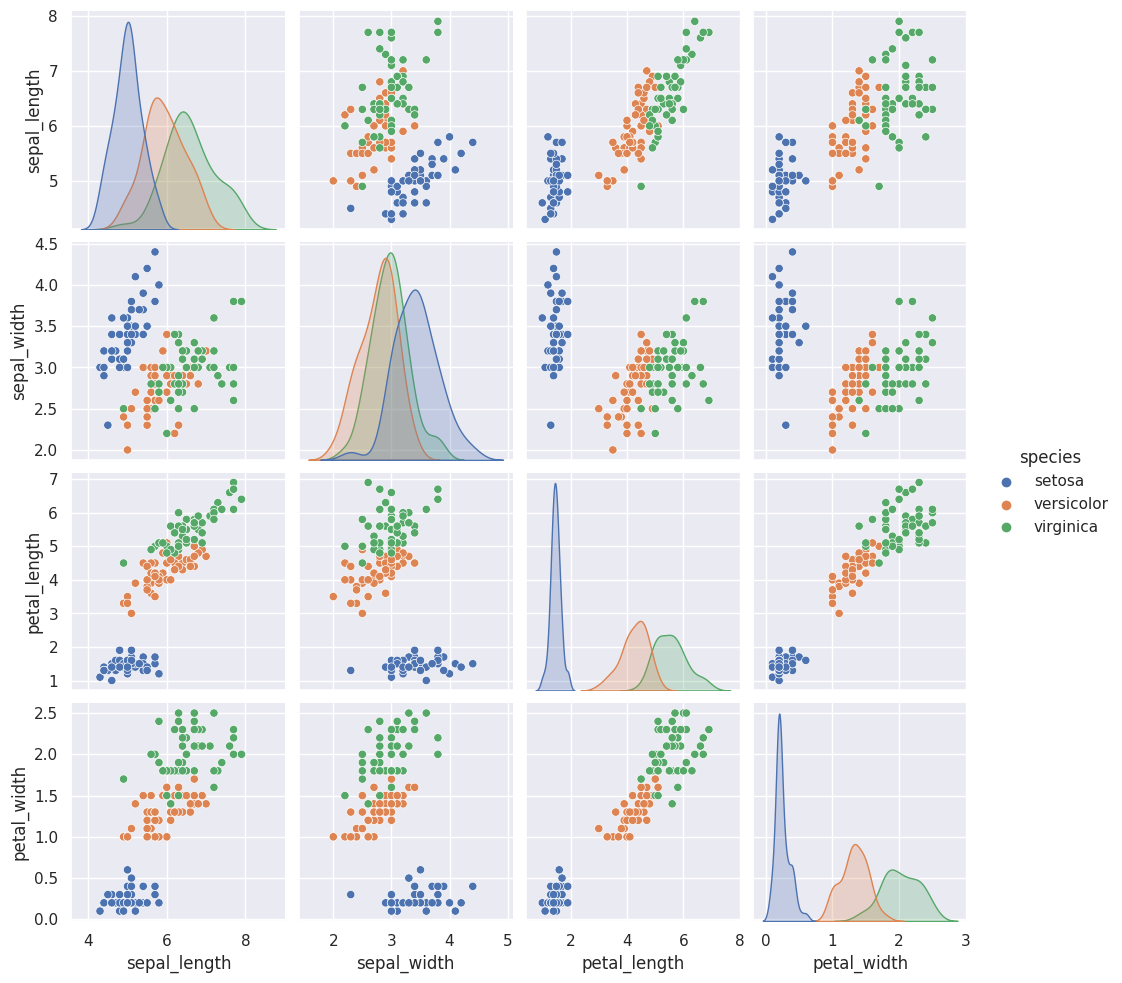

In [11]:


sns.pairplot(data= iris_df, hue= 'species')

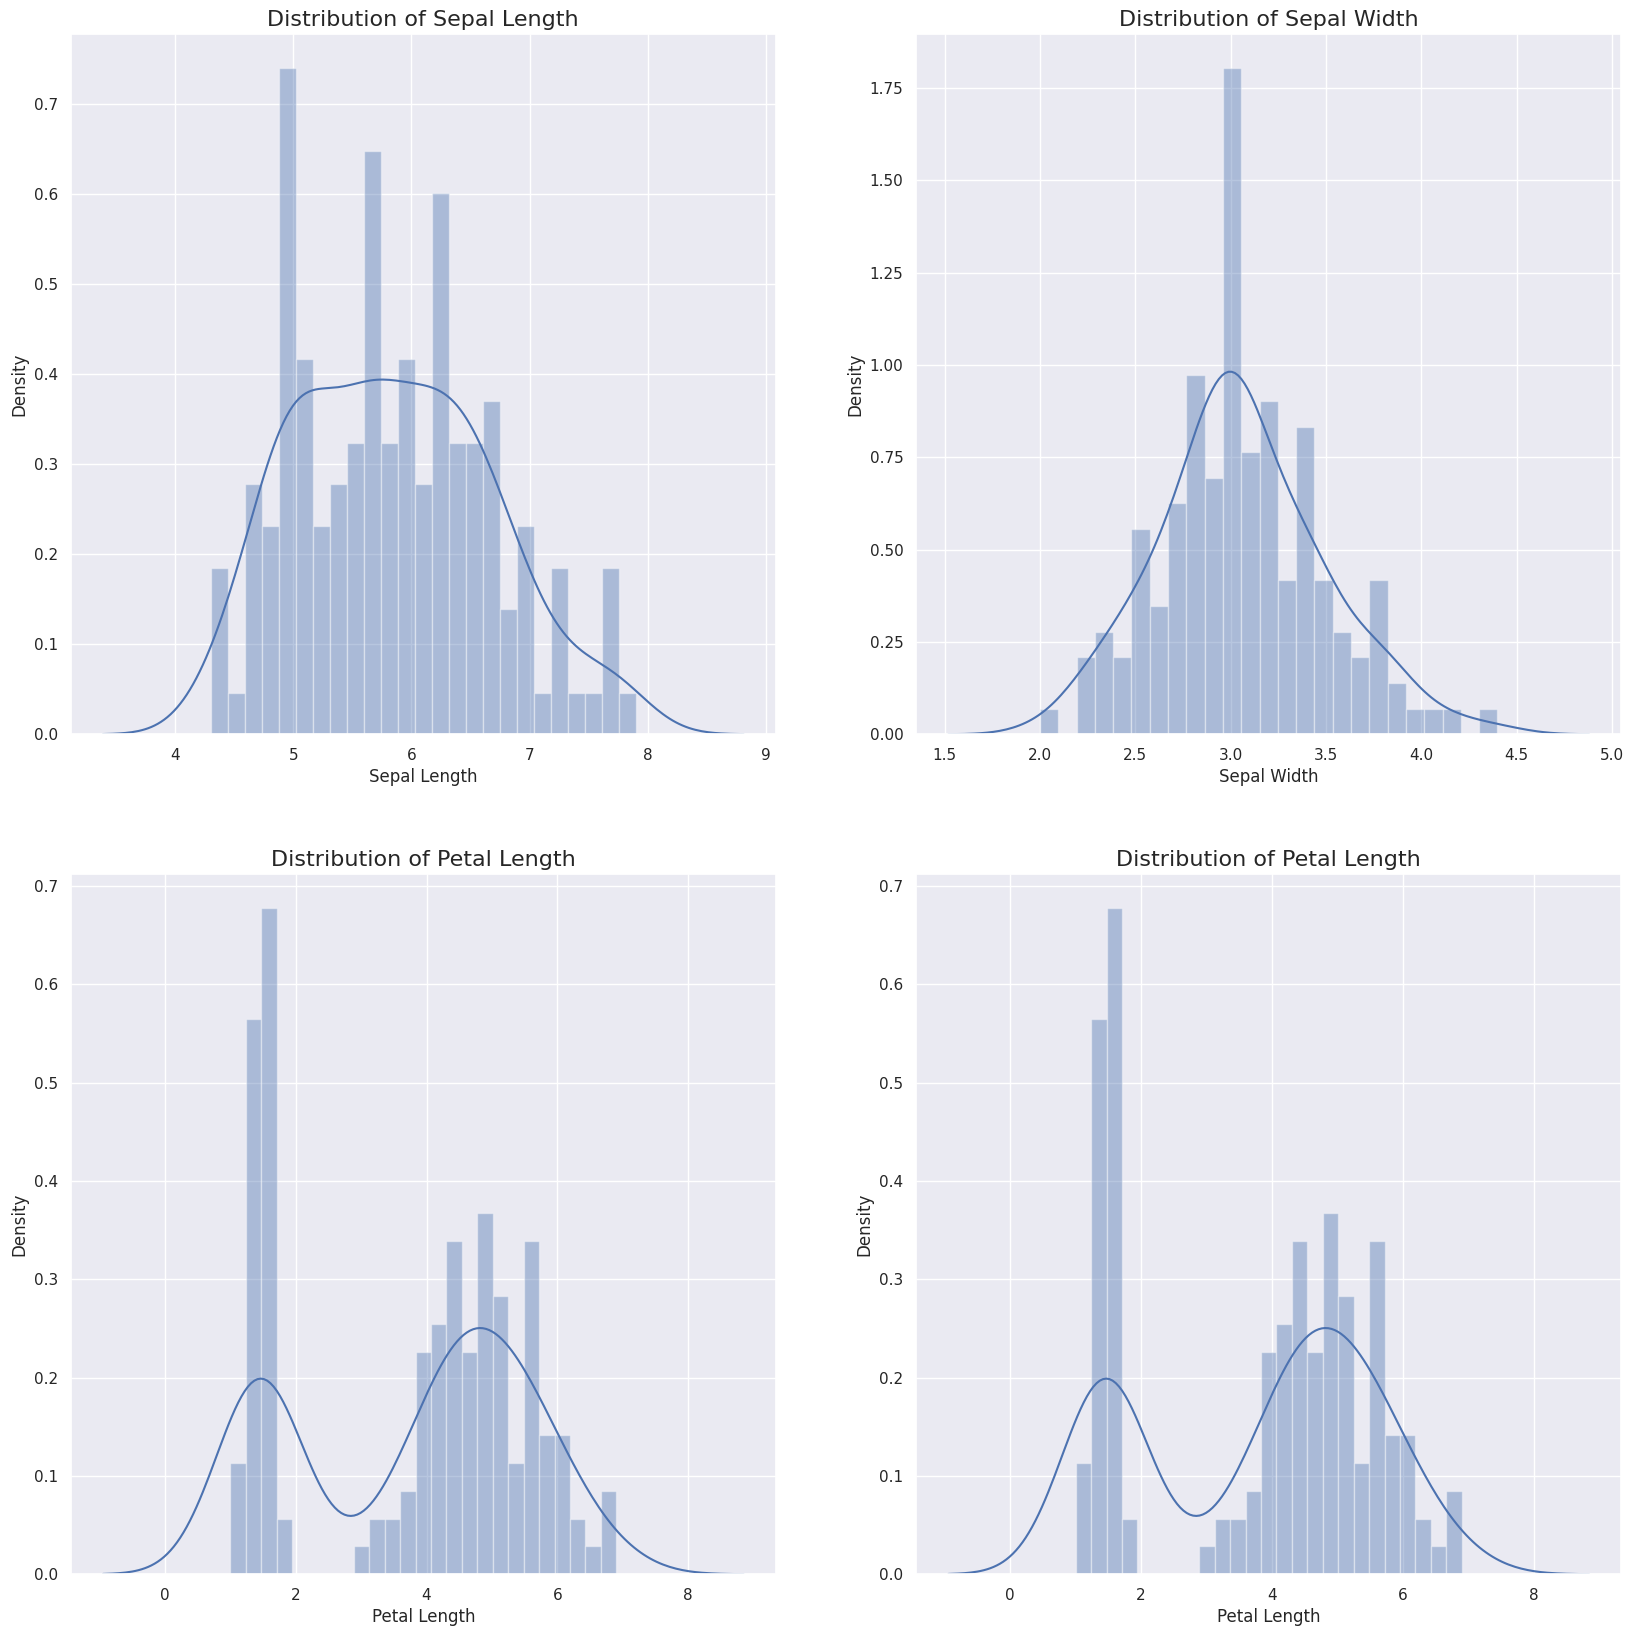

In [9]:
# Let's see the distribution of the two variable from our data
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

# Subplot 1: Distribution plot of 'Sepal Length'
k1 = sns.distplot(iris_df['sepal_length'], bins=25, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Sepal Length', fontsize=16)
ax0.set(xlabel= 'Sepal Length', ylabel= 'Density')

# Subplot 2: Distribution plot of 'Sepal Width'
k2 = sns.distplot(iris_df['sepal_width'], bins=25, ax=ax1) # add to subplot 2
ax1.set_title('Distribution of Sepal Width', fontsize=16)
ax1.set(xlabel= 'Sepal Width', ylabel= 'Density')

# Subplot 1: Distribution plot of 'Petal Length'
k1 = sns.distplot(iris_df['petal_length'], bins=25, ax=ax2) # add to subplot 3
ax2.set_title('Distribution of Petal Length', fontsize=16)
ax2.set(xlabel= 'Petal Length', ylabel= 'Density')

# Subplot 1: Distribution plot of 'Petal Length'
k1 = sns.distplot(iris_df['petal_length'], bins=25, ax=ax3) # add to subplot 4
ax3.set_title('Distribution of Petal Length', fontsize=16)
ax3.set(xlabel= 'Petal Length', ylabel= 'Density')

plt.show()

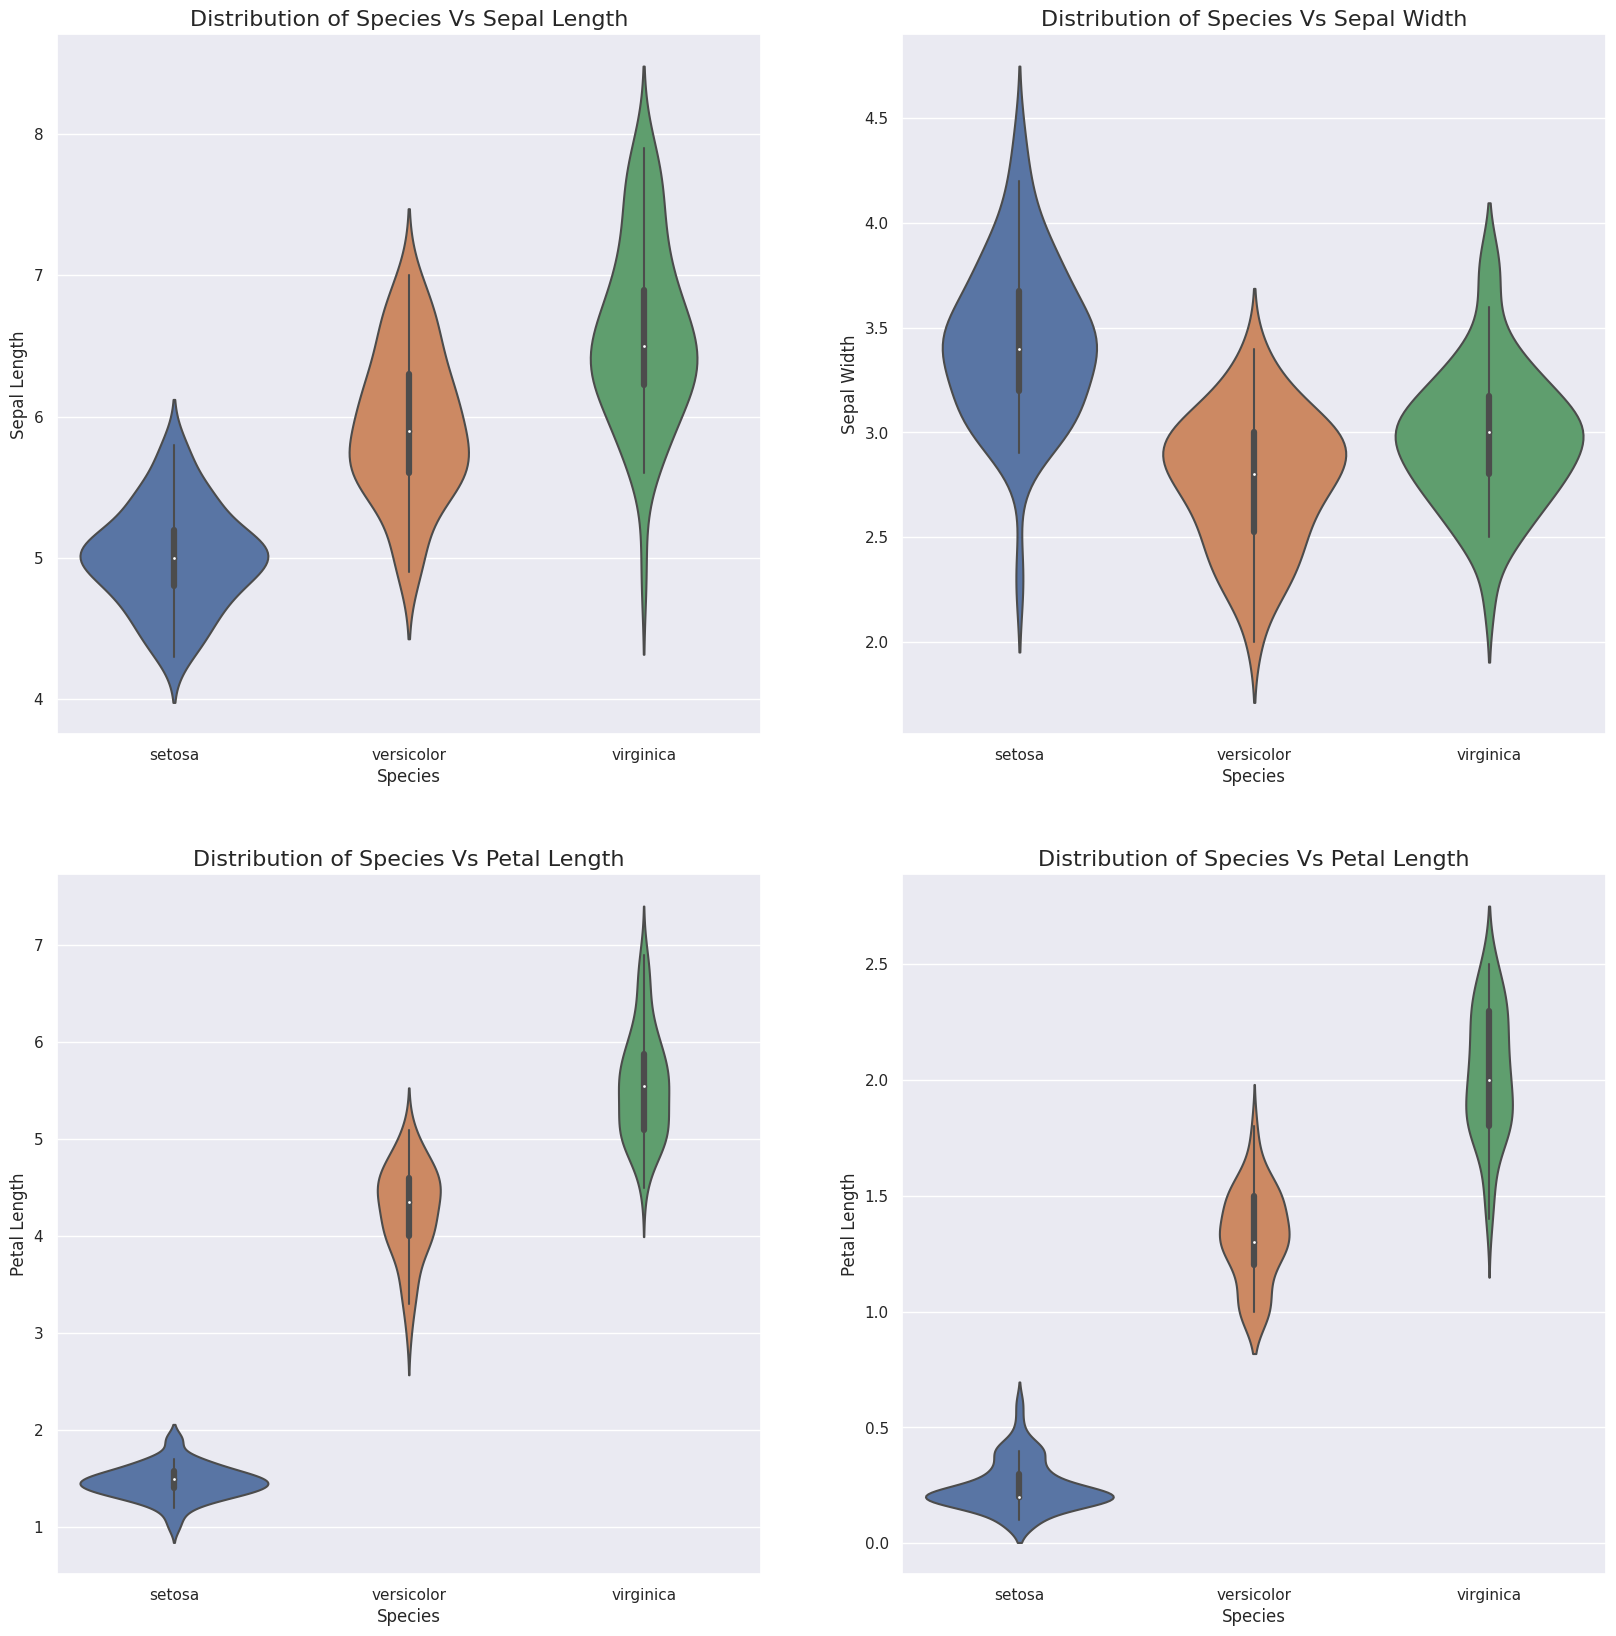

In [12]:
# Let's see the distribution of the two variable from our data
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 1 (2 row, 2 columns, fourth plot)

# Subplot 1: Distribution plot of 'Species Vs Sepal Length'
k1 = sns.violinplot(data= iris_df, x= 'species', y= 'sepal_length', ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Species Vs Sepal Length', fontsize=16)
ax0.set(xlabel= 'Species', ylabel= 'Sepal Length')

# Subplot 2: Distribution plot of 'Species Vs Sepal Length'
k2 = sns.violinplot(data= iris_df, x= 'species', y= 'sepal_width', ax=ax1) # add to subplot 2
ax1.set_title('Distribution of Species Vs Sepal Width', fontsize=16)
ax1.set(xlabel= 'Species', ylabel= 'Sepal Width')

# Subplot 1: Distribution plot of 'Species Vs Sepal Length'
k1 = sns.violinplot(data= iris_df, x= 'species', y= 'petal_length', ax=ax2) # add to subplot 3
ax2.set_title('Distribution of Species Vs Petal Length', fontsize=16)
ax2.set(xlabel= 'Species', ylabel= 'Petal Length')

# Subplot 1: Distribution plot of 'Species Vs Sepal Length'
k1 = sns.violinplot(data= iris_df, x= 'species', y= 'petal_width', ax=ax3) # add to subplot 4
ax3.set_title('Distribution of Species Vs Petal Length', fontsize=16)
ax3.set(xlabel= 'Species', ylabel= 'Petal Length')

plt.show()


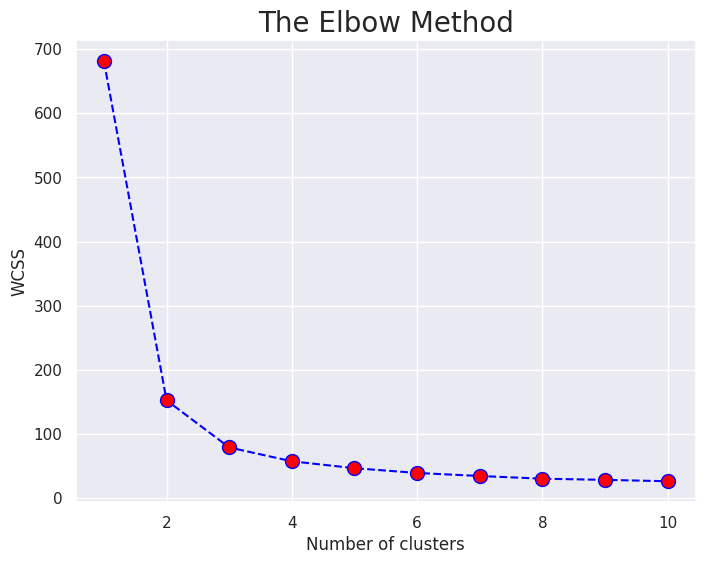

In [14]:

x = iris_df.iloc[:, [0, 1, 2, 3]].values

wcss = []
x[:6]

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph,
# `allowing us to observe 'The elbow'
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, color='blue', linestyle='dashed', marker='o', \
         markerfacecolor='red', markersize=10)
plt.title('The Elbow Method', fontsize= 20)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

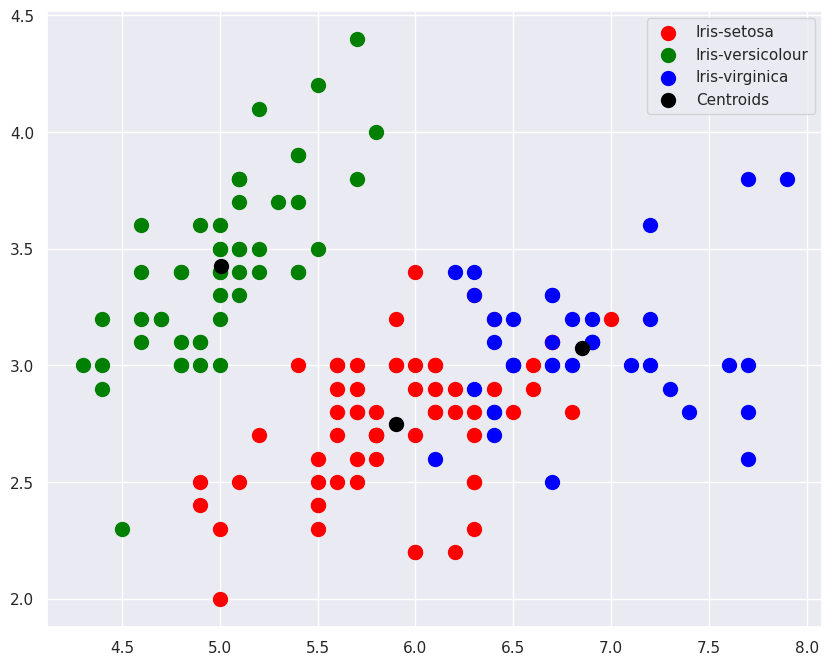

In [15]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', \
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans


# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()